In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import networkx as nx

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


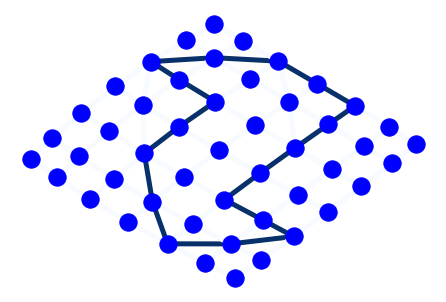

In [4]:
# left image
# setup variables

# base setups
hop_list_l = [((0,2),(1,3)), ((1,3),(1,2)), ((1,2),(2,2)), ((2,2),(3,2)), ((3,2),(3,1)), 
           ((3,1),(2,0)), ((2,0),(2,1)), ((2,1),(1,1)), ((1,1),(0,2))]

hop_list_r = [((0,3),(1,3)),((1,3),(1,2)),((1,2),(2,2)), ((2,2),(3,1)), ((3,1),(2,1)), ((2,1),(2,0)),
             ((2,0),(1,1)),((1,1),(0,2)), ((0,2),(0,3))]

sf = 2 # scale factor for size increase
g_l = nx.grid_graph([3*sf + 1, 3*sf + 1])

sd = 16 # seed for layout
pos = nx.spring_layout(g_l, seed = sd)

# give grid edges weight 0
edge_list = [e for e in g_l.edges]
for i in range(0, len(edge_list)):
    g_l[edge_list[i][0]][edge_list[i][1]]['weight'] = 0
    
# make left edges 1 and right edges 0 for scaled graph
scaled_l = []
for i in range(0, len(hop_list_l)):
    se = scaled_edge(hop_list_l[i], sf)
    for j in range(0, len(se)):
        scaled_l.append(se[j])

scaled_r = []
for i in range(0, len(hop_list_r)):
    se = scaled_edge(hop_list_r[i], sf)
    for j in range(0, len(se)):
        scaled_r.append(se[j])

#print(scaled_l)
g_l.add_edges_from(scaled_r)
for i in range(0, len(scaled_r)):
    g_l[scaled_r[i][0]][scaled_r[i][1]]['weight'] = 0

g_l.add_edges_from(scaled_l)
for i in range(0, len(scaled_l)):
    g_l[scaled_l[i][0]][scaled_l[i][1]]['weight'] = 1

    
edges,weights = zip(*nx.get_edge_attributes(g_l,'weight').items())
nx.draw(g_l, pos, node_color='b', edgelist=edges, edge_color=weights, width=5, edge_cmap=plt.cm.Blues)

In [3]:
# generates list of scaled edges corresponding to the input edge
# input edge must be horizontal, vertical, or 45 degree diagonal
# e: edge in form ((a,b),(c,d)), with a <= c and b <= d (<- GET RID OF THIS RESTRICTION)
# scale_fac: scale factor for size increase
def scaled_edge(e, scale_fac):
    se_list = [(e[0][0]*scale_fac, e[0][1]*scale_fac), (e[1][0]*scale_fac, e[1][1]*scale_fac)]
    
    # 8 cases of possible e directions
    # NE
    if (e[1][1] - e[0][1] > 0 and e[1][0] - e[0][0] > 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0]+i, se_list[0][1]+i))
    
    # N
    elif (e[1][1] - e[0][1] > 0 and e[1][0] - e[0][0] == 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0], se_list[0][1]+i))
            
    # E
    elif (e[1][1] - e[0][1] == 0 and e[1][0] - e[0][0] > 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0]+i, se_list[0][1]))
            
    # SE
    elif (e[1][1] - e[0][1] < 0 and e[1][0] - e[0][0] > 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0]+i, se_list[0][1]-i))
            
    # S
    elif (e[1][1] - e[0][1] < 0 and e[1][0] - e[0][0] == 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0], se_list[0][1]-i))
            
    # SW
    elif (e[1][1] - e[0][1] < 0 and e[1][0] - e[0][0] < 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0]-i, se_list[0][1]-i))
            
    # W
    elif (e[1][1] - e[0][1] == 0 and e[1][0] - e[0][0] < 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0]-i, se_list[0][1]))
            
    # NW
    elif (e[1][1] - e[0][1] > 0 and e[1][0] - e[0][0] < 0):
        for i in range(1, scale_fac):
            se_list.insert(-1, (se_list[0][0]-i, se_list[0][1]+i))
            
    # make list of edges that makes up the scaled edge
    se = []
    for i in range(0, len(se_list) - 1):
        se.append((se_list[i],se_list[i+1]))
        
    return se

In [44]:
# test of scaled_edge()
scaled_edge(((1,1),(0,2)), 2)

[((2, 2), (1, 3)), ((1, 3), (0, 4))]

In [7]:
# plot spectrum function
def spec(g, title):
    w, v = la.eig(np.array(nx.adjacency_matrix(g).todense()))
    plt.plot(range(1, len(w) + 1), np.sort(np.real(w)), 'ro')
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Eigenvalue')
    plt.title(title)
    #plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    return w, v

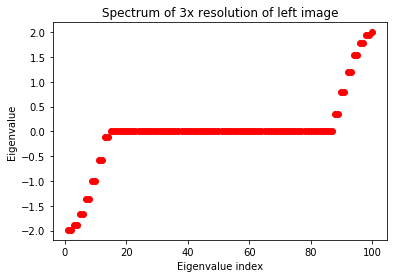

In [11]:
spec(g_l, 'Spectrum of 3x resolution of left image');

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


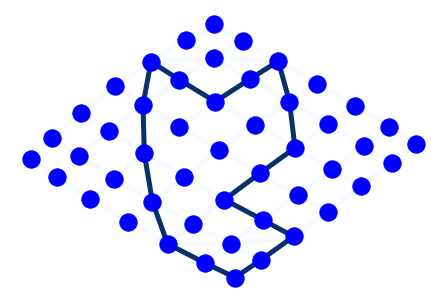

In [7]:
# right image
# setup variables

# base setups
hop_list_l = [((0,2),(1,3)), ((1,3),(1,2)), ((1,2),(2,2)), ((2,2),(3,2)), ((3,2),(3,1)), 
           ((3,1),(2,0)), ((2,0),(2,1)), ((2,1),(1,1)), ((1,1),(0,2))]

hop_list_r = [((0,3),(1,3)),((1,3),(1,2)),((1,2),(2,2)), ((2,2),(3,1)), ((3,1),(2,1)), ((2,1),(2,0)),
             ((2,0),(1,1)),((1,1),(0,2)), ((0,2),(0,3))]

sf = 2 # scale factor for size increase
g_r = nx.grid_graph([3*sf + 1, 3*sf + 1])

sd = 16 # seed for layout
pos = nx.spring_layout(g_r, seed = sd)

# give grid edges weight 0
edge_list = [e for e in g_r.edges]
for i in range(0, len(edge_list)):
    g_r[edge_list[i][0]][edge_list[i][1]]['weight'] = 0
    
# make left edges 1 and right edges 0 for scaled graph
scaled_l = []
for i in range(0, len(hop_list_l)):
    se = scaled_edge(hop_list_l[i], sf)
    for j in range(0, len(se)):
        scaled_l.append(se[j])

scaled_r = []
for i in range(0, len(hop_list_r)):
    se = scaled_edge(hop_list_r[i], sf)
    for j in range(0, len(se)):
        scaled_r.append(se[j])
        
g_r.add_edges_from(scaled_l)
for i in range(0, len(scaled_l)):
    g_r[scaled_l[i][0]][scaled_l[i][1]]['weight'] = 0

#print(scaled_l)
g_r.add_edges_from(scaled_r)
for i in range(0, len(scaled_r)):
    g_r[scaled_r[i][0]][scaled_r[i][1]]['weight'] = 1
    
edges,weights = zip(*nx.get_edge_attributes(g_r,'weight').items())
nx.draw(g_r, pos, node_color='b', edgelist=edges, edge_color=weights, width=5, edge_cmap=plt.cm.Blues)

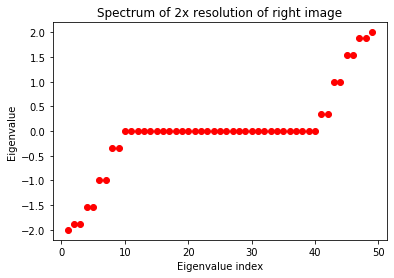

In [8]:
spec(g_r, 'Spectrum of 2x resolution of right image');

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


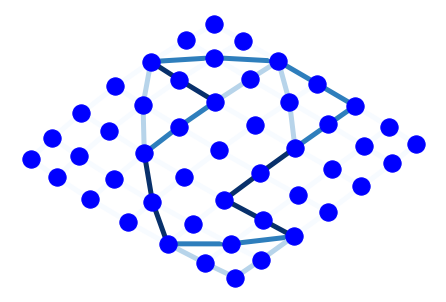

In [47]:
# morph left into right in 10 even steps keeping common edges the same
g_i = g_l
inter_mult = np.arange(0.0, 1.01, 0.1)

g_l_exclusive = [((0,2),(1,3)), ((2,2),(3,2)), ((3,2),(3,1)), ((3,1),(2,0)), ((2,1),(1,1))]
g_r_exclusive = [((0,2),(0,3)), ((0,3),(1,3)), ((2,2),(3,1)), ((3,1),(2,1)), ((2,0),(1,1))]

scaled_le = []
for i in range(0, len(g_l_exclusive)):
    se = scaled_edge(g_l_exclusive[i], sf)
    for j in range(0, len(se)):
        scaled_le.append(se[j])

scaled_re = []
for i in range(0, len(g_r_exclusive)):
    se = scaled_edge(g_r_exclusive[i], sf)
    for j in range(0, len(se)):
        scaled_re.append(se[j])

for i in range(0, len(scaled_le)):
    g_i[scaled_le[i][0]][scaled_le[i][1]]['weight'] = 1 - inter_mult[3]
    
for i in range(0, len(scaled_re)):
    g_i[scaled_re[i][0]][scaled_re[i][1]]['weight'] = inter_mult[3]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

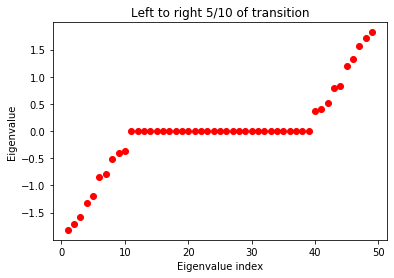

In [48]:
# make plots for each morph step
w_r, v_r = spec(g_i, 'Left to right 5/10 of transition');

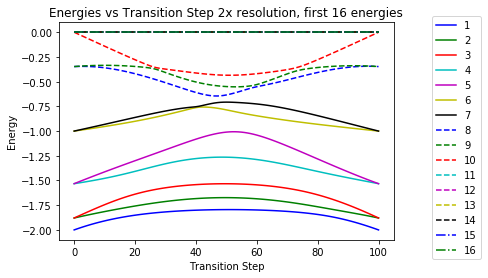

In [63]:
# plot the energy levels vs the transition step

# array of transition scalings at each step
inter_mult = np.arange(0.0, 1.01, 0.01)
# rows are energy levels, cols are transition steps
# use first 16 energy levels
energy_array = np.zeros((16,len(inter_mult)))

for i in range(0, len(inter_mult)):
    # perform the transition at each step
    for j in range(0, len(scaled_le)):
        g_i[scaled_le[j][0]][scaled_le[j][1]]['weight'] = 1 - inter_mult[i]
        
    for j in range(0, len(scaled_re)):
        g_i[scaled_re[j][0]][scaled_re[j][1]]['weight'] = inter_mult[i]
    
    w, v = la.eig(np.array(nx.adjacency_matrix(g_i).todense()))
    energies = np.sort(np.real(w))[0:16]
    
    for j in range(0, len(energies)):
        energy_array[j][i] = energies[j]
        
colors = ['b-','g-','r-','c-','m-', 'y-','k-','b--','g--','r--','c--','m--', 'y--','k--','b-.', 'g-.']
labels = ['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
for i in range(0, len(colors)):
    plt.plot(energy_array[i], colors[i], label=labels[i])

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Transition Step')
plt.ylabel('Energy')
plt.title('Energies vs Transition Step 2x resolution, first 16 energies')
plt.show()

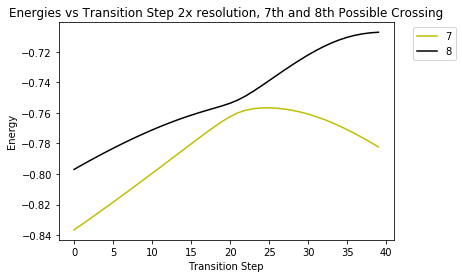

In [70]:
# plot the energy levels vs the transition step 

##########################################
# 7TH AND 8TH TRANSITION POSSIBLE CROSSING
##########################################

# array of transition scalings at each step
inter_mult = np.arange(0.3, 0.5, 0.005)
# rows are energy levels, cols are transition steps
# use 7TH AND 8TH energy levels
energy_array = np.zeros((2,len(inter_mult)))

for i in range(0, len(inter_mult)):
    # perform the transition at each step
    for j in range(0, len(scaled_le)):
        g_i[scaled_le[j][0]][scaled_le[j][1]]['weight'] = 1 - inter_mult[i]
        
    for j in range(0, len(scaled_re)):
        g_i[scaled_re[j][0]][scaled_re[j][1]]['weight'] = inter_mult[i]
    
    w, v = la.eig(np.array(nx.adjacency_matrix(g_i).todense()))
    energies = np.sort(np.real(w))[5:7]
    
    for j in range(0, len(energies)):
        energy_array[j][i] = energies[j]
        
colors = ['y-','k-']
labels = ['7','8']
for i in range(0, len(colors)):
    plt.plot(energy_array[i], colors[i], label=labels[i])

plt.legend(bbox_to_anchor=(1.2, 1))
plt.xlabel('Transition Step')
plt.ylabel('Energy')
plt.title('Energies vs Transition Step 2x resolution, 7th and 8th Possible Crossing')
plt.show()

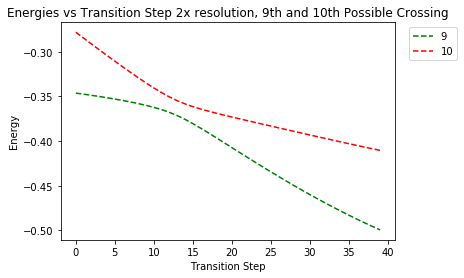

In [71]:
# plot the energy levels vs the transition step 

##########################################
# 9TH AND 10TH TRANSITION POSSIBLE CROSSING
##########################################

# array of transition scalings at each step
inter_mult = np.arange(0.2, 0.4, 0.005)
# rows are energy levels, cols are transition steps
# use 7TH AND 8TH energy levels
energy_array = np.zeros((2,len(inter_mult)))

for i in range(0, len(inter_mult)):
    # perform the transition at each step
    for j in range(0, len(scaled_le)):
        g_i[scaled_le[j][0]][scaled_le[j][1]]['weight'] = 1 - inter_mult[i]
        
    for j in range(0, len(scaled_re)):
        g_i[scaled_re[j][0]][scaled_re[j][1]]['weight'] = inter_mult[i]
    
    w, v = la.eig(np.array(nx.adjacency_matrix(g_i).todense()))
    energies = np.sort(np.real(w))[8:10]
    
    for j in range(0, len(energies)):
        energy_array[j][i] = energies[j]
        
colors = ['g--','r--']
labels = ['9','10']
for i in range(0, len(colors)):
    plt.plot(energy_array[i], colors[i], label=labels[i])

plt.legend(bbox_to_anchor=(1.2, 1))
plt.xlabel('Transition Step')
plt.ylabel('Energy')
plt.title('Energies vs Transition Step 2x resolution, 9th and 10th Possible Crossing')
plt.show()